In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime 

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import warnings
warnings.filterwarnings("ignore")

In [8]:
passengers_df = pd.read_csv('data/AIRLINE_PASSENGERS.csv', parse_dates=['Date'])
passengers_df.head(10)

,Date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


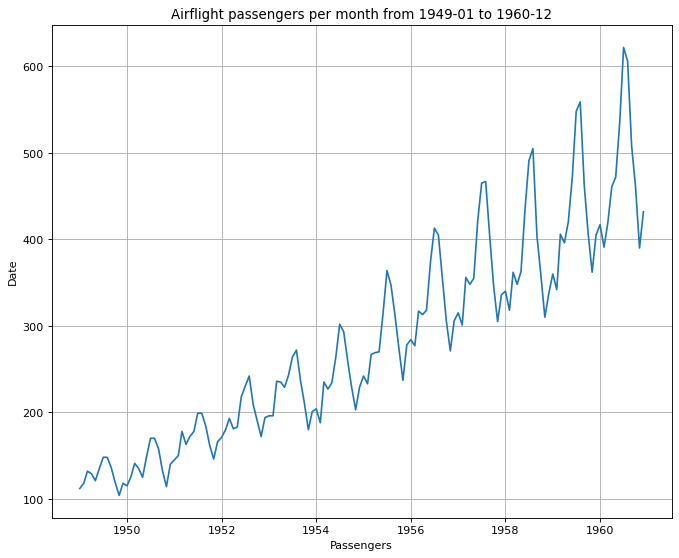

In [9]:
plt.figure(figsize = (10, 8), dpi = 80)
plt.plot(passengers_df['Date'], passengers_df['Passengers'])
plt.title("Airflight passengers per month from 1949-01 to 1960-12")
plt.grid()
plt.xlabel("Passengers")
plt.ylabel("Date")
plt.show()

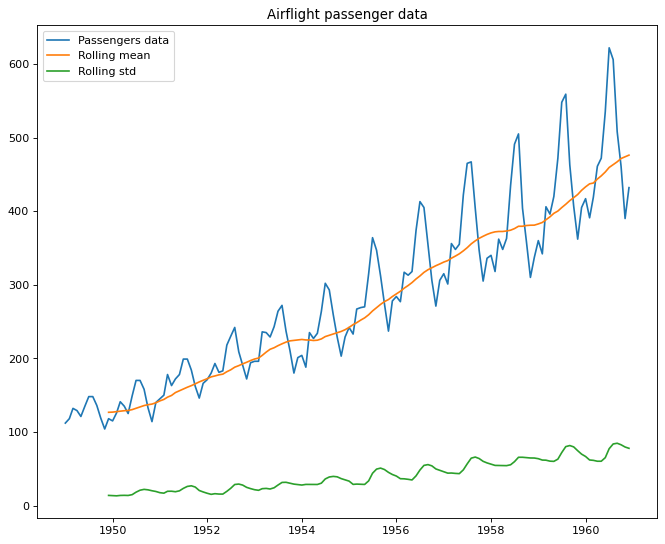

In [10]:
plt.figure(figsize = (10, 8), dpi = 80)
rolling_mean = passengers_df['Passengers'].rolling(window = 12).mean()
rolling_std =passengers_df['Passengers'].rolling(window = 12).std()
plt.plot(passengers_df['Date'], passengers_df['Passengers'], label = "Passengers data")
plt.plot(passengers_df['Date'], rolling_mean, label = "Rolling mean")
plt.plot(passengers_df['Date'], rolling_std, label = "Rolling std")
plt.title("Airflight passenger data")
plt.legend()

plt.show()

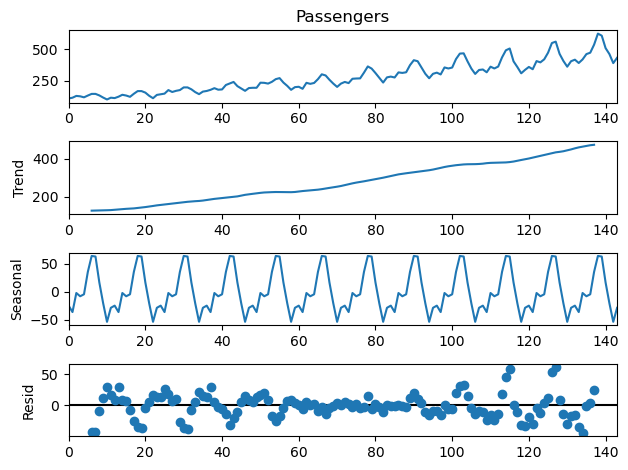

In [11]:
#seasonal decompose
plt.figure(figsize= (5, 5))
decomposed = seasonal_decompose(x=passengers_df['Passengers'], model = 'additative', period=12)
decomposed.plot()

<Figure size 500x500 with 0 Axes>

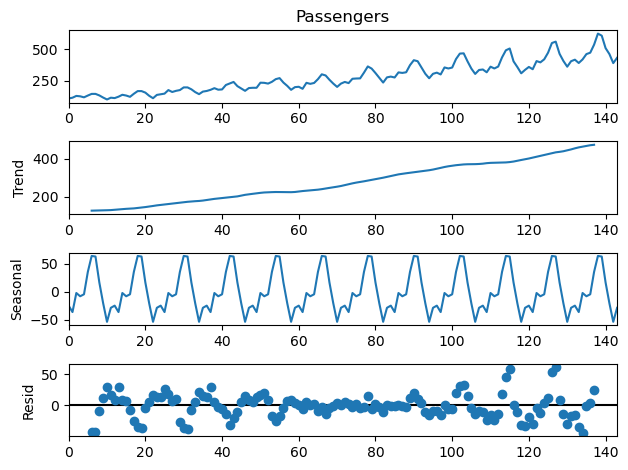

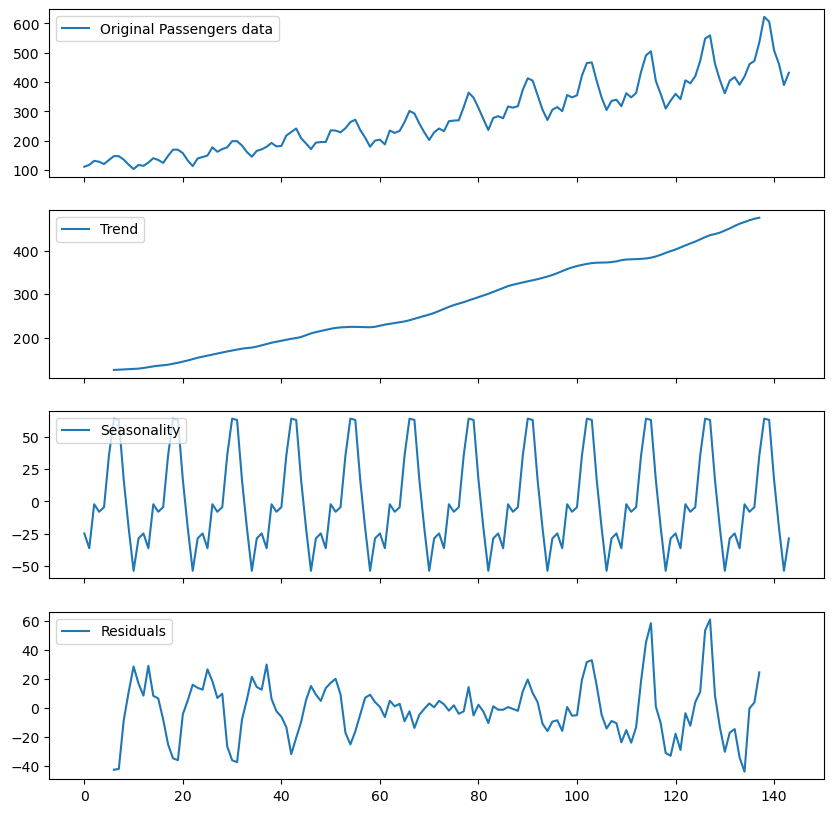

In [12]:
#source: https://www.section.io/engineering-education/time-series-decomposition-in-python/
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)

decomposed_trend = decomposed.trend
decomposed_seasonal = decomposed.seasonal
decomposed_residual = decomposed.resid


axes[0].plot(passengers_df['Passengers'], label='Original Passengers data') 
axes[0].legend(loc='upper left');
# second plot to be for trend
axes[1].plot(decomposed_trend, label='Trend')
axes[1].legend(loc='upper left');
# third plot to be Seasonality component
axes[2].plot(decomposed_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');
# last last plot to be Residual component
axes[3].plot(decomposed_residual, label='Residuals')
axes[3].legend(loc='upper left');
fig.set_size_inches((10, 10))

plt.show()

0       NaN
1       6.0
2      14.0
3      -3.0
4      -8.0
       ... 
139   -16.0
140   -98.0
141   -47.0
142   -71.0
143    42.0
Name: Passengers, Length: 144, dtype: float64
Variance of the rolling variance window: 13.429201620435473


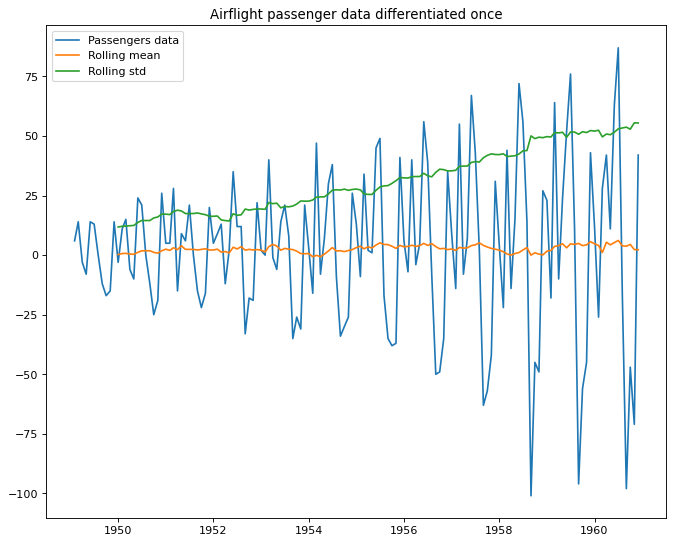

In [13]:
diffed_ = passengers_df[passengers_df.columns[1]]

diffed_  = diffed_.diff()

print(diffed_)
plt.figure(figsize = (10, 8), dpi = 80)
rolling_mean = diffed_.rolling(window = 12).mean()
rolling_std =diffed_.rolling(window = 12).std()
print(f'Variance of the rolling variance window: {rolling_std.std()}')
plt.plot(passengers_df['Date'], diffed_, label = "Passengers data")
plt.plot(passengers_df['Date'], rolling_mean, label = "Rolling mean")
plt.plot(passengers_df['Date'], rolling_std, label = "Rolling std")
plt.title("Airflight passenger data differentiated once")

plt.legend()
plt.show()

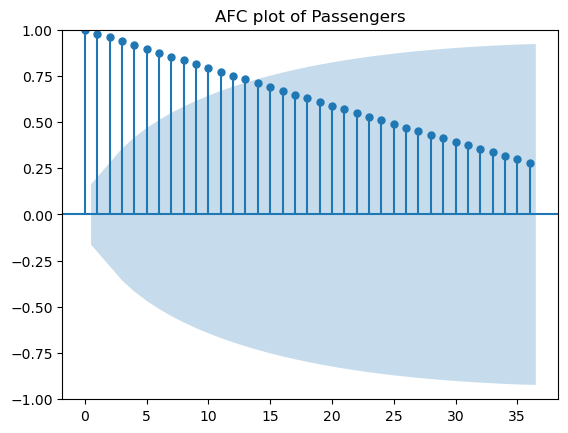

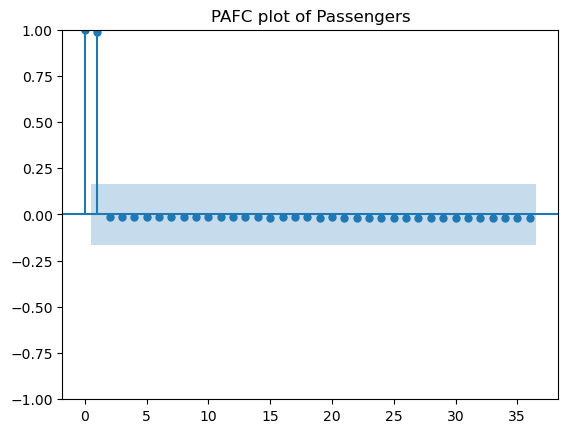

In [25]:
plot_acf(passengers_df[passengers_df.columns[0]], lags = int(len(passengers_df)/4), title = f'AFC plot of Passengers')
plot_pacf(passengers_df[passengers_df.columns[0]], lags = int(len(passengers_df)/4), title = f'PAFC plot of Passengers')
plt.show()

### Transform

In [15]:
passengers_transformed = boxcox(passengers_df[passengers_df.columns[1]], lmbda = 0)
passengers_transformed = pd.DataFrame(passengers_transformed)


Variance of the rolling variance window: 258.3429856670939


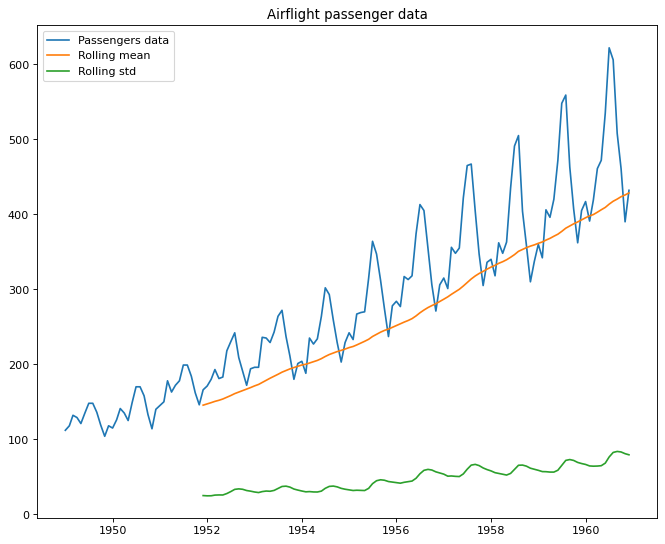

Variance of the rolling variance window: 0    0.00004
dtype: float64


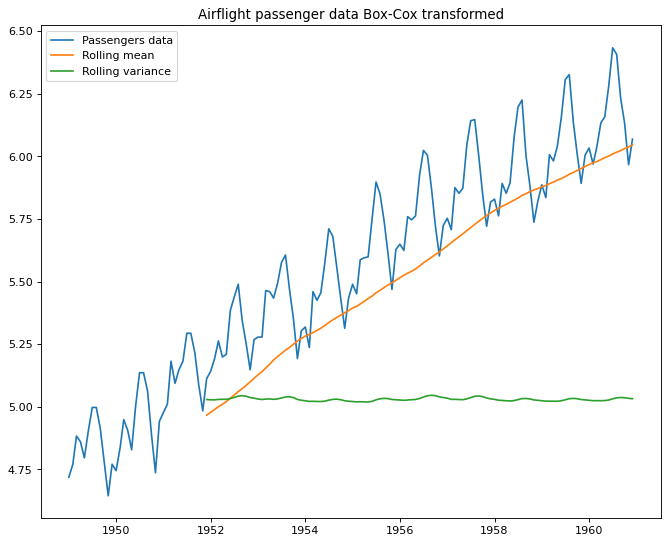

In [16]:
plt.figure(figsize = (10, 8), dpi = 80)
rolling_mean = passengers_df['Passengers'].rolling(window = int(len(passengers_df)/4)).mean()
rolling_std =passengers_df['Passengers'].rolling(window = int(len(passengers_df)/4)).std()
print(f'Variance of the rolling variance window: {rolling_std.var()}')
plt.plot(passengers_df['Date'], passengers_df['Passengers'], label = "Passengers data")
plt.plot(passengers_df['Date'], rolling_mean, label = "Rolling mean")
plt.plot(passengers_df['Date'], rolling_std, label = "Rolling std")
plt.title("Airflight passenger data")
plt.legend()

plt.show()

plt.figure(figsize = (10, 8), dpi = 80)
rolling_mean = passengers_transformed.rolling(window = int(len(passengers_df)/4)).mean()
rolling_var =passengers_transformed.rolling(window = int(len(passengers_df)/4)).var()
print(f'Variance of the rolling variance window: {rolling_var.var()}')
plt.plot(passengers_df['Date'], passengers_transformed[passengers_transformed.columns[0]], label = "Passengers data")
plt.plot(passengers_df['Date'], rolling_mean, label = "Rolling mean")
plt.plot(passengers_df['Date'], rolling_var+5, label = "Rolling variance")
plt.title("Airflight passenger data Box-Cox transformed")

plt.legend()
plt.show()





### Differencing

In [17]:
passengers_diffed = passengers_transformed.diff()

In [18]:
passengers_diffed = passengers_diffed[passengers_diffed[passengers_diffed.columns[0]].notna()]

In [19]:
passengers_diffed

,0
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
5,0.109484
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


In [20]:
plt.figure(figsize = (10, 8), dpi = 80)
rolling_mean = passengers_diffed.rolling(window = 12).mean()
rolling_var =passengers_diffed.rolling(window = 12).var()
print(f'Variance of the rolling variance window: {rolling_var.var()}')
plt.plot(passengers_df['Date'][1:], passengers_diffed[passengers_diffed.columns[0]], label = "Passengers")
plt.plot(passengers_df['Date'][1:], rolling_mean, label = "Rolling mean")
plt.plot(passengers_df['Date'][1:], rolling_var, label = "Rolling variance")
plt.legend()
plt.title("Airflight passenger data transformed and differentiated")

Variance of the rolling variance window: 0    0.000005
dtype: float64


Text(0.5, 1.0, 'Airflight passenger data transformed and differentiated')

In [21]:
passengers_diffed

,0
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
5,0.109484
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


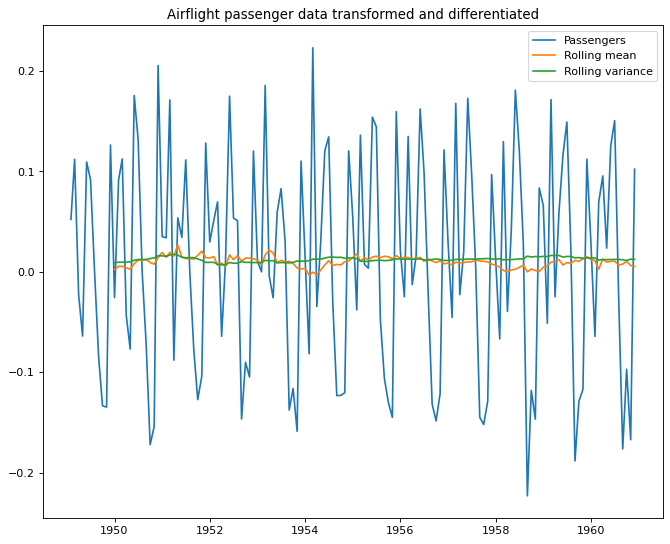

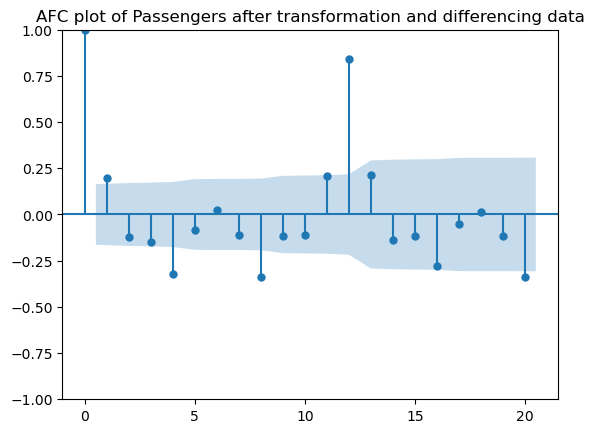

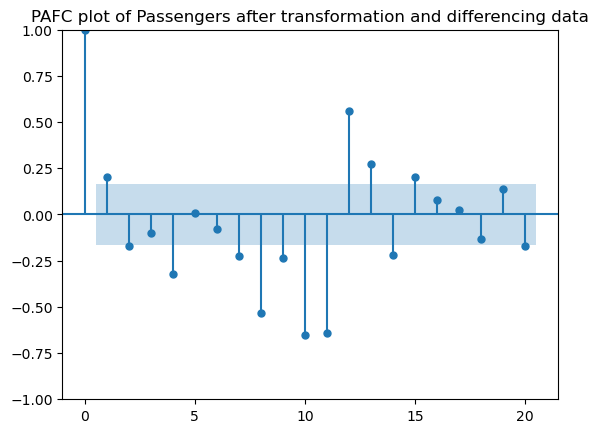

In [22]:
plot_acf(passengers_diffed[passengers_diffed.columns[0]], lags = 20, title = f'AFC plot of Passengers after transformation and differencing data')
plot_pacf(passengers_diffed[passengers_diffed.columns[0]], lags = 20, title = f'PAFC plot of Passengers after transformation and differencing data')
plt.show()

From the plots, it is clear that p = 4 and q = 3.

In [23]:
model = ARIMA(passengers_diffed[passengers_diffed.columns[0]], order=(3,0,2))
model_fit = model.fit(disp=1)
fitted_vals = model_fit.fittedvalues
print(model_fit.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
passengers_transformed

,0
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


In [ ]:
passengers_diffed[passengers_diffed.columns[0]]

1      0.052186
2      0.112117
3     -0.022990
4     -0.064022
5      0.109484
         ...   
139   -0.026060
140   -0.176399
141   -0.097083
142   -0.167251
143    0.102279
Name: 0, Length: 143, dtype: float64

# Diff passengers twice (?)

In [ ]:
passengers_reverse_diffed = np.r_[passengers_transformed[passengers_transformed.columns[0]][0], passengers_diffed[passengers_diffed.columns[0]]].cumsum()
passengers_reverse_transformed = inv_boxcox(passengers_reverse_diffed, 0)

In [ ]:
fitted_diffed = np.r_[passengers_transformed[passengers_transformed.columns[0]][0], fitted_vals].cumsum()
fitted_transformed = inv_boxcox(fitted_diffed, 0)

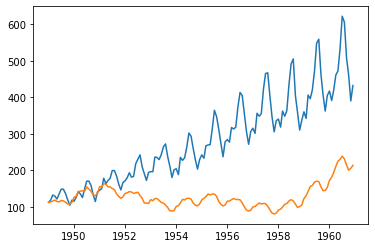

In [ ]:
plt.plot(passengers_df['Date'], passengers_df['Passengers'])
plt.plot(passengers_df['Date'], fitted_transformed)
plt.show()

In [ ]:
#plot qq plot av residuals og fordeling

# Tester

In [ ]:
#"MOST LIKELY STATIONARIY"